In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [553]:
# Load the dataset
data = pd.read_csv("amazon_prime_users.csv")



In [554]:
# Check for missing values
data.isnull().sum().any()



False

In [555]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

In [556]:
# Convert columns to datetime
date_columns = ['Date of Birth', 'Membership Start Date', 'Membership End Date']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

In [557]:
# Display the first 5 rows of the data set
data.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [560]:
# Assuming your DataFrame is named 'data_model' and the email column is named 'Email Address'
duplicate_email_rows = data[data.duplicated(subset=['Email Address'], keep=False)]

# Now 'duplicate_email_rows' contains rows with duplicate email addresses
duplicate_email_rows

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
6,7,Benjamin Marshall,michaellewis@example.net,michaellewis,2003-02-09,Male,Carlsonchester,2024-04-08,2025-04-08,Monthly,Amex,Auto-renew,Frequent,Clothing,Sci-Fi,Tablet,Medium,4.4,10
33,34,Whitney Underwood,ujones@example.com,ujones,2002-07-23,Female,New Jenniferport,2024-03-30,2025-03-30,Annual,Mastercard,Auto-renew,Regular,Electronics,Horror,Smartphone,Low,4.5,10
84,85,Keith Baker,ujones@example.com,ujones,1972-07-11,Female,Langton,2024-02-03,2025-02-02,Annual,Amex,Manual,Occasional,Clothing,Horror,Smartphone,Medium,3.0,1
107,108,Grant Jensen,tyler29@example.com,tyler29,1944-07-10,Female,East Mark,2024-04-11,2025-04-11,Monthly,Amex,Manual,Regular,Clothing,Action,Tablet,Medium,3.2,7
120,121,Lisa Washington,dbailey@example.net,dbailey,1991-11-03,Male,East Charlotte,2024-03-02,2025-03-02,Annual,Visa,Manual,Frequent,Books,Drama,Smartphone,High,4.2,2
129,130,Jordan Jackson,ubrown@example.org,ubrown,1953-09-28,Female,Lake Amystad,2024-01-05,2025-01-04,Annual,Mastercard,Manual,Occasional,Electronics,Sci-Fi,Tablet,Medium,4.4,3
147,148,Troy Smith,john96@example.net,john96,1980-06-26,Male,West Jennifer,2024-03-27,2025-03-27,Monthly,Visa,Manual,Regular,Books,Horror,Smart TV,Low,4.3,0
175,176,Alexandra James,twilliams@example.com,twilliams,1986-07-07,Female,Lake Codymouth,2024-02-13,2025-02-12,Monthly,Mastercard,Auto-renew,Frequent,Books,Horror,Smart TV,High,3.3,8
401,402,Olivia Harper,twilliams@example.com,twilliams,2004-06-22,Female,Port Charles,2024-02-27,2025-02-26,Annual,Amex,Auto-renew,Frequent,Electronics,Documentary,Smartphone,High,4.0,6
443,444,Brent Key,sburke@example.com,sburke,1957-04-24,Male,Gonzalezland,2024-01-08,2025-01-07,Annual,Amex,Manual,Frequent,Books,Romance,Smart TV,Medium,3.5,5


In [538]:
# Remove columns that I won't need
data = data.drop(columns = ['User ID', 'Name', 'Email Address', 'Username'])


In [539]:
# Create an age column based on years since date of birth
current_date = datetime.now()
current_year = current_date.year
data['Age'] = current_year - data['Date of Birth'].dt.year
data.head()


,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Age
0,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3,71
1,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7,46
2,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8,30
3,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7,60
4,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1,63


In [540]:
# Check month distribution for membership starting
data['Month'] = data['Membership Start Date'].dt.month
data['Month_Text'] = data['Membership Start Date'].dt.month_name().str.slice(stop=3)

# Group by `Month` and `Month_Text`, sum it, and sort. Assign result to new DataFrame
data_by_month = data.groupby(['Month', 'Month_Text']).size().reset_index(name='Count').sort_values('Month').head(12)
data_by_month

# April is lower than the rest as the data only goes through 4-13-2024

,Month,Month_Text,Count
0,1,Jan,773
1,2,Feb,651
2,3,Mar,744
3,4,Apr,332


C:\Users\luke3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


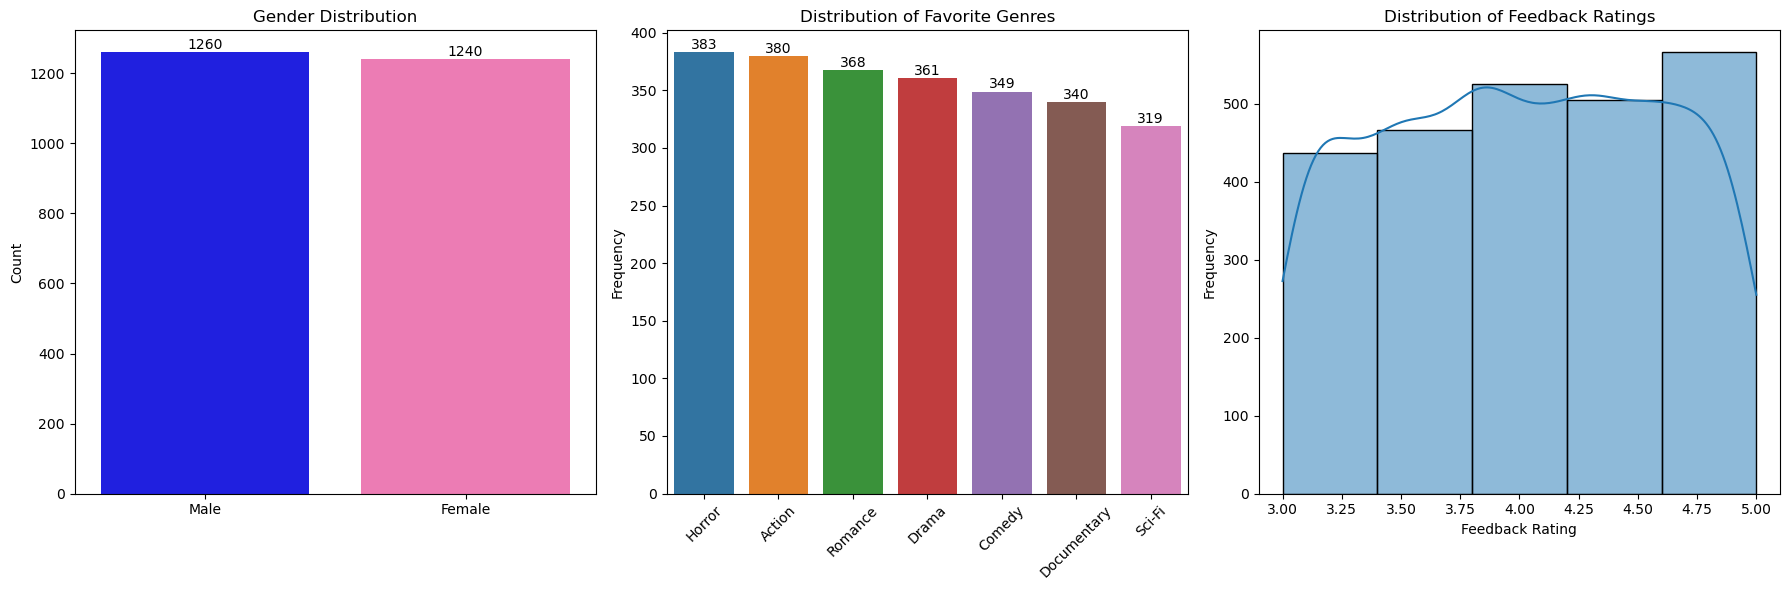

In [541]:
# Create subplots for the three plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Bar plot of Gender Distribution
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0], palette=['blue', 'hotpink'])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')

# Add counts above the bars
for index, value in enumerate(gender_counts.values):
    axes[0].text(index, value + 0.1, str(value), ha='center', va='bottom')

# Plot 2: Bar plot of Favorite Genres
genre_counts = data['Favorite Genres'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, ax=axes[1])
axes[1].set_title('Distribution of Favorite Genres')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add counts above the bars
for index, value in enumerate(genre_counts.values):
    axes[1].text(index, value + 0.1, str(value), ha='center', va='bottom')
    
# Plot 3: Histogram of Feedback Ratings
sns.histplot(data=data, x='Feedback/Ratings', bins=5, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Feedback Ratings')
axes[2].set_xlabel('Feedback Rating')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

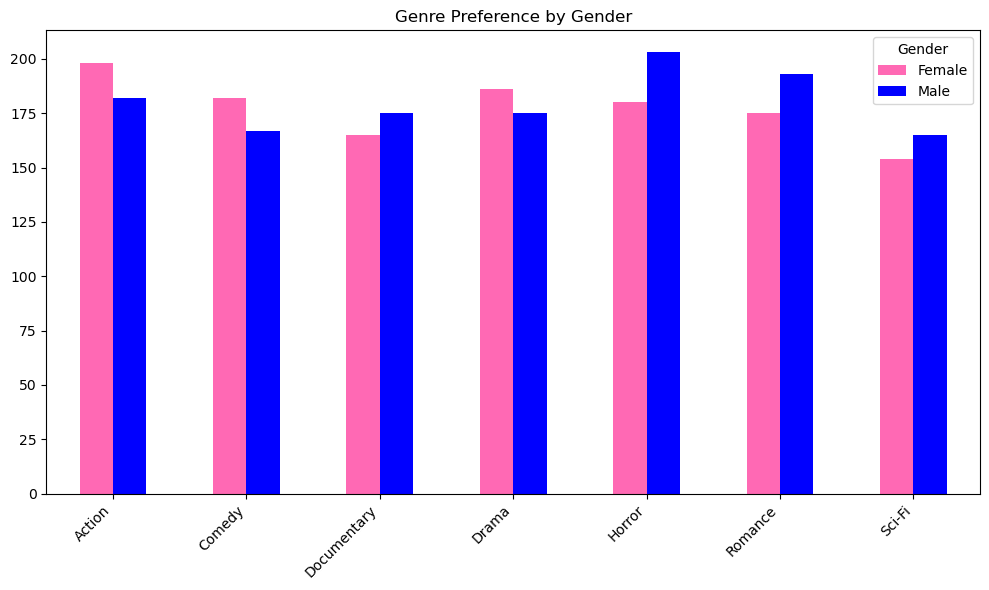

In [542]:

# Group data by gender and favorite genres, and calculate counts
genre_summary = data.groupby(['Gender', 'Favorite Genres']).size().reset_index(name='Count')
#print(genre_summary)

# Pivot the DataFrame to have favorite genres as columns
genre_summary_pivot = genre_summary.pivot(index='Favorite Genres', columns='Gender', values='Count').fillna(0)

# Plot
genre_summary_pivot.plot(kind='bar', figsize=(10, 6), color=['hotpink', 'blue'])
plt.title('Genre Preference by Gender')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [543]:
data['Usage Frequency'].value_counts()

Usage Frequency
Frequent      851
Regular       827
Occasional    822
Name: count, dtype: int64

In [544]:
# Create a copy of the dataset to manipulate for the model
data_model = data.copy()


# Drop more features for easier reading, now that the initial EDA is complete
data_model = data_model.drop(columns = ['Gender', 
                                        'Location', 
                                        'Membership Start Date', 
                                        'Membership End Date',
                                        'Date of Birth',
                                        'Month_Text',
                                        'Month',
                                        'Feedback/Ratings',
                                        'Payment Information',
                                        'Age'])

In [545]:
# Define a mapping dictionary
usage_frequency_mapping = {
    'Occasional': 1,
    'Regular': 2,
    'Frequent': 3
}

engagement_metrics_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# Apply the mapping to the "Usage Frequency" column in your dataset
data_model['Usage Frequency'] = data_model['Usage Frequency'].map(usage_frequency_mapping)

data_model['Engagement Metrics'] = data_model['Engagement Metrics'].map(engagement_metrics_mapping)

In [546]:
# Define the columns you want to convert to dummy variables
columns_to_convert = ['Renewal Status', 
                      'Devices Used',
                      'Purchase History',
                      'Favorite Genres',
                      'Customer Support Interactions']
                      
# Create dummy variables for the specified columns
dummy_variables = pd.get_dummies(data_model[columns_to_convert], drop_first=True, prefix='', prefix_sep='', dtype=int)

# Concatenate the dummy variables with the original dataset
data_model = pd.concat([data_model, dummy_variables], axis=1)

# Drop the original categorical columns (optional)
data_model.drop(columns=columns_to_convert, inplace=True)


In [547]:
data_model.head()

,Subscription Plan,Usage Frequency,Engagement Metrics,Manual,Smartphone,Tablet,Clothing,Electronics,Comedy,Documentary,Drama,Horror,Romance,Sci-Fi
0,Annual,2,2,1,0,0,0,1,0,1,0,0,0,0
1,Monthly,2,2,1,1,0,0,1,0,0,0,1,0,0
2,Monthly,2,1,1,0,0,0,0,1,0,0,0,0,0
3,Monthly,2,3,0,0,0,0,1,0,1,0,0,0,0
4,Annual,3,1,0,0,0,1,0,0,0,1,0,0,0


In [548]:
# Split the data into features (X) and target variable (y)
X = data_model.drop(columns=['Subscription Plan'])  # Features
y = data_model['Subscription Plan']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Define a list of models
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

# Iterate over each model
for model in models:
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the model's performance
    print(f"Model: {model.__class__.__name__}, Accuracy: {accuracy}")

Model: LogisticRegression, Accuracy: 0.49066666666666664
Model: DecisionTreeClassifier, Accuracy: 0.5466666666666666
Model: RandomForestClassifier, Accuracy: 0.528


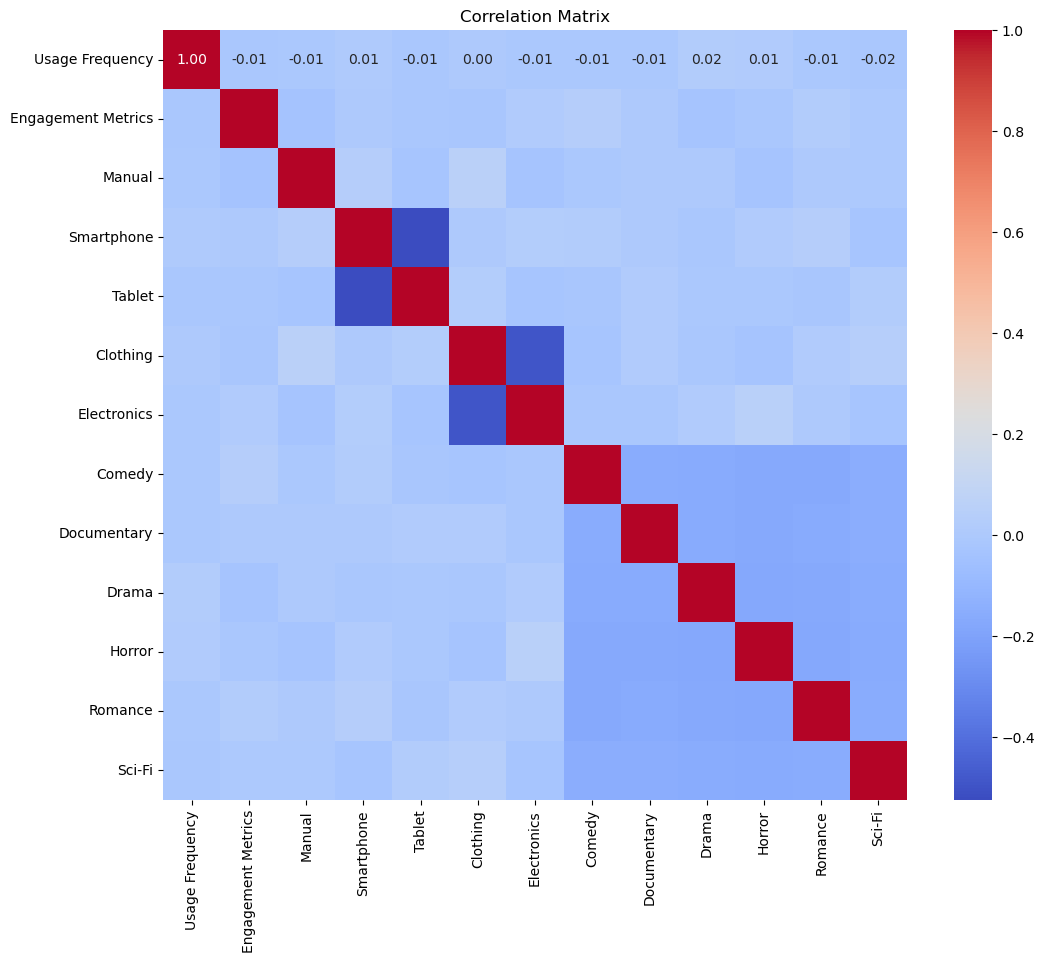

In [549]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

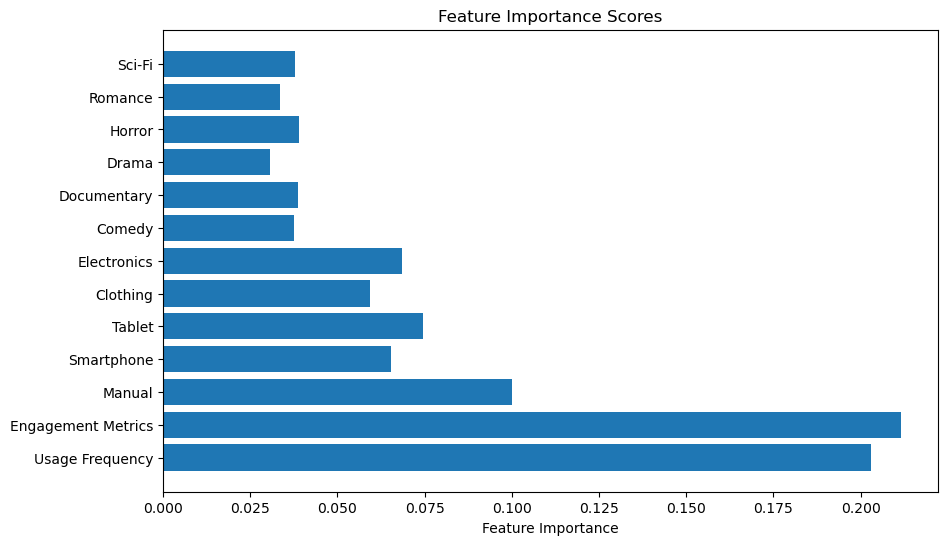

In [550]:
# Separate features and target variable
X = data_model.drop(columns=['Subscription Plan'])
y = data_model['Subscription Plan']

# Train random forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.show()


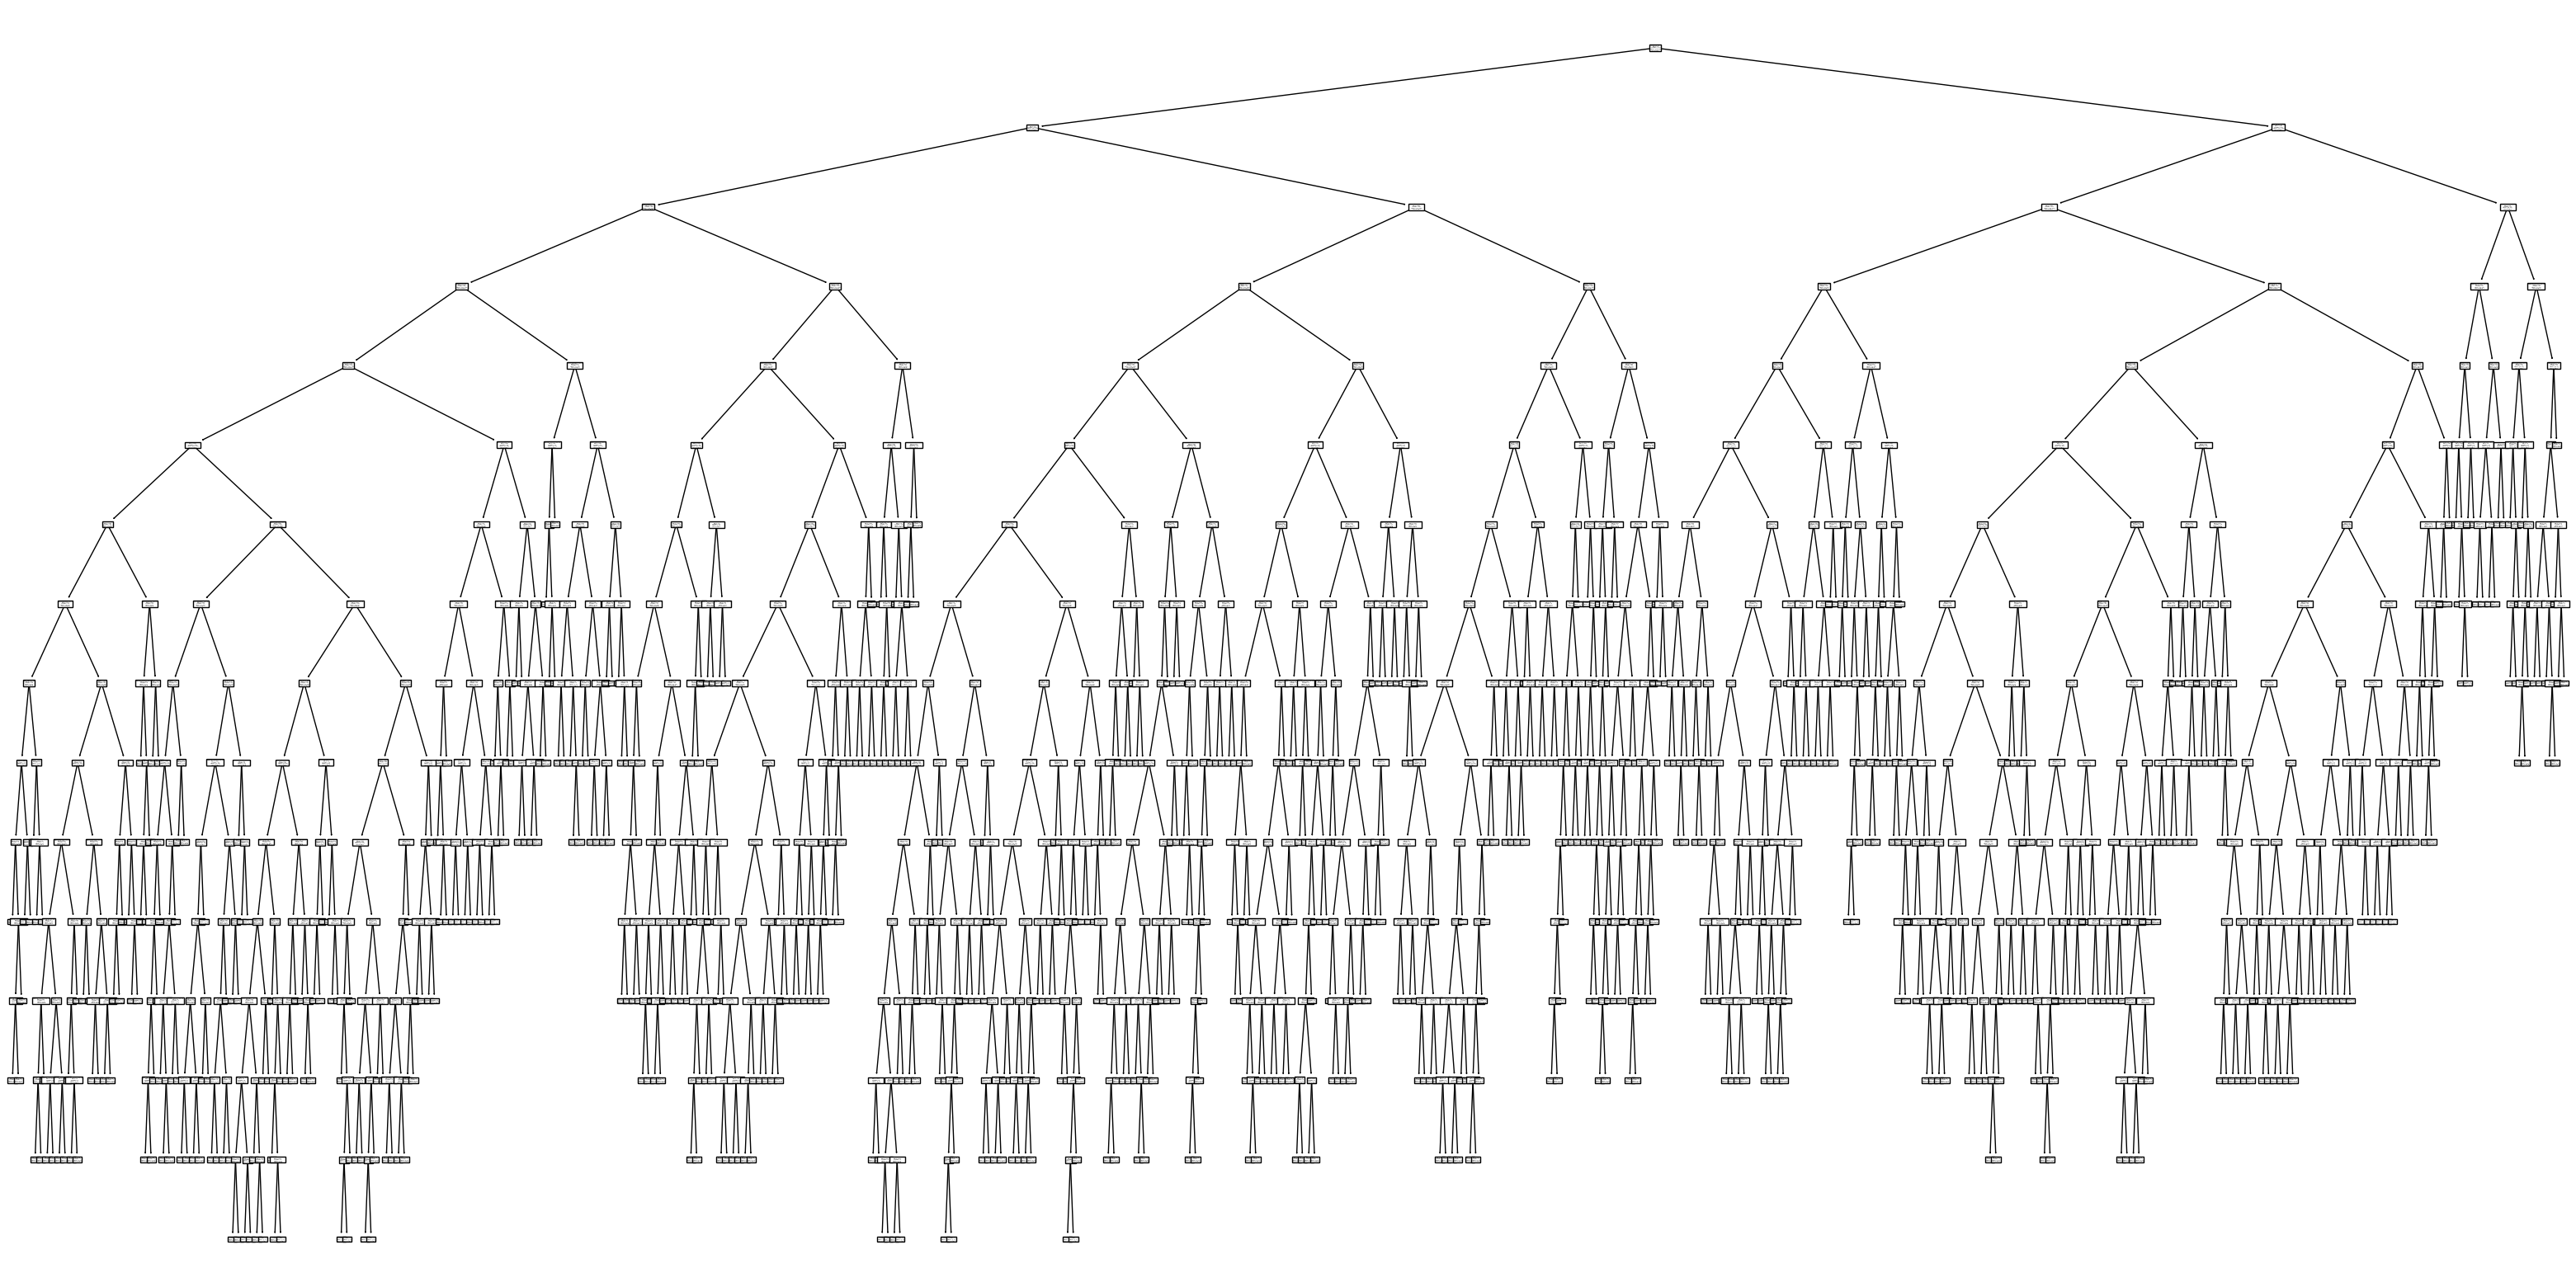

In [551]:
from sklearn.tree import plot_tree


# Assuming your decision tree classifier is named 'dt_classifier'
plt.figure(figsize=(40, 20))
plot_tree(models[1], feature_names=data_model.columns, class_names=['Plan A', 'Plan B'])
plt.show()